In [36]:
import tensorflow as tf
import numpy as np


In [57]:
corpus_raw = 'Whether its the battlefield in Syria the situation in Ukraine the Russians active measures I am sure there are many topics that President Trump and President Putin will discuss'
corpus_raw = corpus_raw.lower()
print(corpus_raw)

whether its the battlefield in syria the situation in ukraine the russians active measures i am sure there are many topics that president trump and president putin will discuss


In [58]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

print(words)

['whether', 'its', 'the', 'battlefield', 'in', 'syria', 'the', 'situation', 'in', 'ukraine', 'the', 'russians', 'active', 'measures', 'i', 'am', 'sure', 'there', 'are', 'many', 'topics', 'that', 'president', 'trump', 'and', 'president', 'putin', 'will', 'discuss']


In [59]:
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
print(vocab_size)

25


In [60]:
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word
print(word2int)
print(int2word)

{'and': 0, 'president': 1, 'am': 2, 'syria': 3, 'whether': 4, 'its': 5, 'battlefield': 6, 'measures': 7, 'the': 8, 'discuss': 9, 'putin': 10, 'i': 11, 'sure': 12, 'active': 13, 'are': 14, 'that': 15, 'many': 16, 'in': 17, 'trump': 18, 'ukraine': 19, 'russians': 20, 'there': 21, 'topics': 22, 'situation': 23, 'will': 24}
{0: 'and', 1: 'president', 2: 'am', 3: 'syria', 4: 'whether', 5: 'its', 6: 'battlefield', 7: 'measures', 8: 'the', 9: 'discuss', 10: 'putin', 11: 'i', 12: 'sure', 13: 'active', 14: 'are', 15: 'that', 16: 'many', 17: 'in', 18: 'trump', 19: 'ukraine', 20: 'russians', 21: 'there', 22: 'topics', 23: 'situation', 24: 'will'}


In [61]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

print(sentences)

[['whether', 'its', 'the', 'battlefield', 'in', 'syria', 'the', 'situation', 'in', 'ukraine', 'the', 'russians', 'active', 'measures', 'i', 'am', 'sure', 'there', 'are', 'many', 'topics', 'that', 'president', 'trump', 'and', 'president', 'putin', 'will', 'discuss']]


In [62]:
WINDOW_SIZE = 2

In [63]:
data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

print(data)

[['whether', 'its'], ['whether', 'the'], ['its', 'whether'], ['its', 'the'], ['its', 'battlefield'], ['the', 'whether'], ['the', 'its'], ['the', 'battlefield'], ['the', 'in'], ['battlefield', 'its'], ['battlefield', 'the'], ['battlefield', 'in'], ['battlefield', 'syria'], ['in', 'the'], ['in', 'battlefield'], ['in', 'syria'], ['in', 'the'], ['syria', 'battlefield'], ['syria', 'in'], ['syria', 'the'], ['syria', 'situation'], ['the', 'in'], ['the', 'syria'], ['the', 'situation'], ['the', 'in'], ['situation', 'syria'], ['situation', 'the'], ['situation', 'in'], ['situation', 'ukraine'], ['in', 'the'], ['in', 'situation'], ['in', 'ukraine'], ['in', 'the'], ['ukraine', 'situation'], ['ukraine', 'in'], ['ukraine', 'the'], ['ukraine', 'russians'], ['the', 'in'], ['the', 'ukraine'], ['the', 'russians'], ['the', 'active'], ['russians', 'ukraine'], ['russians', 'the'], ['russians', 'active'], ['russians', 'measures'], ['active', 'the'], ['active', 'russians'], ['active', 'measures'], ['active', 

In [64]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [65]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

print(x_train)
print(y_train)

[array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0., 

In [66]:
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train)
print(y_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


In [67]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

print(x)
print(y_label)

Tensor("Placeholder_4:0", shape=(?, 25), dtype=float32)
Tensor("Placeholder_5:0", shape=(?, 25), dtype=float32)


In [68]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

print(W1)
print(b1)
print(hidden_representation)

<tf.Variable 'Variable_8:0' shape=(25, 5) dtype=float32_ref>
<tf.Variable 'Variable_9:0' shape=(5,) dtype=float32_ref>
Tensor("Add_4:0", shape=(?, 5), dtype=float32)


In [69]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

print(W2)
print(b1)
print(prediction)

<tf.Variable 'Variable_10:0' shape=(5, 25) dtype=float32_ref>
<tf.Variable 'Variable_9:0' shape=(5,) dtype=float32_ref>
Tensor("Softmax_2:0", shape=(?, 25), dtype=float32)


In [70]:
# initialize tensorflow session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

In [71]:
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

In [72]:
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

In [73]:
n_iters = 10000
# train for n_iter iterations

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  6.77489
loss is :  6.4884
loss is :  6.25975
loss is :  6.07178
loss is :  5.9138
loss is :  5.77872
loss is :  5.66157
loss is :  5.55875
loss is :  5.46752
loss is :  5.38578
loss is :  5.3119
loss is :  5.24457
loss is :  5.18274
loss is :  5.12558
loss is :  5.0724
loss is :  5.02266
loss is :  4.9759
loss is :  4.93173
loss is :  4.88986
loss is :  4.85002
loss is :  4.812
loss is :  4.77561
loss is :  4.74069
loss is :  4.70711
loss is :  4.67476
loss is :  4.64353
loss is :  4.61334
loss is :  4.58411
loss is :  4.55577
loss is :  4.52826
loss is :  4.50153
loss is :  4.47553
loss is :  4.45022
loss is :  4.42555
loss is :  4.40149
loss is :  4.37802
loss is :  4.35509
loss is :  4.33269
loss is :  4.31078
loss is :  4.28935
loss is :  4.26837
loss is :  4.24783
loss is :  4.2277
loss is :  4.20797
loss is :  4.18863
loss is :  4.16965
loss is :  4.15103
loss is :  4.13275
loss is :  4.11481
loss is :  4.09718
loss is :  4.07986
loss is :  4.06284
loss is :  4.04611
l

loss is :  2.16681
loss is :  2.16577
loss is :  2.16472
loss is :  2.16368
loss is :  2.16264
loss is :  2.16161
loss is :  2.16058
loss is :  2.15954
loss is :  2.15852
loss is :  2.15749
loss is :  2.15647
loss is :  2.15545
loss is :  2.15443
loss is :  2.15341
loss is :  2.1524
loss is :  2.15139
loss is :  2.15038
loss is :  2.14937
loss is :  2.14837
loss is :  2.14736
loss is :  2.14636
loss is :  2.14537
loss is :  2.14437
loss is :  2.14338
loss is :  2.14239
loss is :  2.1414
loss is :  2.14042
loss is :  2.13944
loss is :  2.13845
loss is :  2.13748
loss is :  2.1365
loss is :  2.13553
loss is :  2.13456
loss is :  2.13359
loss is :  2.13262
loss is :  2.13165
loss is :  2.13069
loss is :  2.12973
loss is :  2.12877
loss is :  2.12782
loss is :  2.12687
loss is :  2.12591
loss is :  2.12496
loss is :  2.12402
loss is :  2.12307
loss is :  2.12213
loss is :  2.12119
loss is :  2.12025
loss is :  2.11932
loss is :  2.11838
loss is :  2.11745
loss is :  2.11652
loss is :  2.11

loss is :  1.83277
loss is :  1.8324
loss is :  1.83203
loss is :  1.83166
loss is :  1.8313
loss is :  1.83093
loss is :  1.83057
loss is :  1.83021
loss is :  1.82984
loss is :  1.82948
loss is :  1.82912
loss is :  1.82875
loss is :  1.82839
loss is :  1.82803
loss is :  1.82767
loss is :  1.82731
loss is :  1.82695
loss is :  1.82659
loss is :  1.82624
loss is :  1.82588
loss is :  1.82552
loss is :  1.82516
loss is :  1.82481
loss is :  1.82445
loss is :  1.8241
loss is :  1.82374
loss is :  1.82339
loss is :  1.82304
loss is :  1.82268
loss is :  1.82233
loss is :  1.82198
loss is :  1.82163
loss is :  1.82127
loss is :  1.82092
loss is :  1.82057
loss is :  1.82022
loss is :  1.81987
loss is :  1.81953
loss is :  1.81918
loss is :  1.81883
loss is :  1.81848
loss is :  1.81814
loss is :  1.81779
loss is :  1.81744
loss is :  1.8171
loss is :  1.81675
loss is :  1.81641
loss is :  1.81607
loss is :  1.81572
loss is :  1.81538
loss is :  1.81504
loss is :  1.8147
loss is :  1.8143

loss is :  1.68656
loss is :  1.68636
loss is :  1.68616
loss is :  1.68597
loss is :  1.68577
loss is :  1.68558
loss is :  1.68538
loss is :  1.68519
loss is :  1.68499
loss is :  1.6848
loss is :  1.6846
loss is :  1.68441
loss is :  1.68421
loss is :  1.68402
loss is :  1.68382
loss is :  1.68363
loss is :  1.68343
loss is :  1.68324
loss is :  1.68305
loss is :  1.68285
loss is :  1.68266
loss is :  1.68247
loss is :  1.68227
loss is :  1.68208
loss is :  1.68189
loss is :  1.6817
loss is :  1.6815
loss is :  1.68131
loss is :  1.68112
loss is :  1.68093
loss is :  1.68074
loss is :  1.68055
loss is :  1.68035
loss is :  1.68016
loss is :  1.67997
loss is :  1.67978
loss is :  1.67959
loss is :  1.6794
loss is :  1.67921
loss is :  1.67902
loss is :  1.67883
loss is :  1.67864
loss is :  1.67845
loss is :  1.67826
loss is :  1.67807
loss is :  1.67788
loss is :  1.67769
loss is :  1.6775
loss is :  1.67731
loss is :  1.67712
loss is :  1.67693
loss is :  1.67675
loss is :  1.67656

loss is :  1.60209
loss is :  1.60195
loss is :  1.60181
loss is :  1.60167
loss is :  1.60154
loss is :  1.6014
loss is :  1.60126
loss is :  1.60113
loss is :  1.60099
loss is :  1.60085
loss is :  1.60072
loss is :  1.60058
loss is :  1.60044
loss is :  1.60031
loss is :  1.60017
loss is :  1.60003
loss is :  1.5999
loss is :  1.59976
loss is :  1.59962
loss is :  1.59949
loss is :  1.59935
loss is :  1.59922
loss is :  1.59908
loss is :  1.59895
loss is :  1.59881
loss is :  1.59868
loss is :  1.59854
loss is :  1.59841
loss is :  1.59827
loss is :  1.59814
loss is :  1.598
loss is :  1.59787
loss is :  1.59773
loss is :  1.5976
loss is :  1.59746
loss is :  1.59733
loss is :  1.59719
loss is :  1.59706
loss is :  1.59693
loss is :  1.59679
loss is :  1.59666
loss is :  1.59653
loss is :  1.59639
loss is :  1.59626
loss is :  1.59612
loss is :  1.59599
loss is :  1.59586
loss is :  1.59573
loss is :  1.59559
loss is :  1.59546
loss is :  1.59533
loss is :  1.59519
loss is :  1.5950

loss is :  1.54457
loss is :  1.54449
loss is :  1.54441
loss is :  1.54432
loss is :  1.54424
loss is :  1.54416
loss is :  1.54407
loss is :  1.54399
loss is :  1.54391
loss is :  1.54382
loss is :  1.54374
loss is :  1.54366
loss is :  1.54357
loss is :  1.54349
loss is :  1.54341
loss is :  1.54333
loss is :  1.54324
loss is :  1.54316
loss is :  1.54308
loss is :  1.543
loss is :  1.54291
loss is :  1.54283
loss is :  1.54275
loss is :  1.54267
loss is :  1.54259
loss is :  1.5425
loss is :  1.54242
loss is :  1.54234
loss is :  1.54226
loss is :  1.54218
loss is :  1.5421
loss is :  1.54201
loss is :  1.54193
loss is :  1.54185
loss is :  1.54177
loss is :  1.54169
loss is :  1.54161
loss is :  1.54153
loss is :  1.54145
loss is :  1.54137
loss is :  1.54129
loss is :  1.54121
loss is :  1.54113
loss is :  1.54105
loss is :  1.54097
loss is :  1.54089
loss is :  1.54081
loss is :  1.54073
loss is :  1.54065
loss is :  1.54057
loss is :  1.54049
loss is :  1.54041
loss is :  1.540

loss is :  1.51192
loss is :  1.51186
loss is :  1.51181
loss is :  1.51176
loss is :  1.51171
loss is :  1.51166
loss is :  1.51161
loss is :  1.51156
loss is :  1.51151
loss is :  1.51146
loss is :  1.51141
loss is :  1.51136
loss is :  1.51131
loss is :  1.51126
loss is :  1.51121
loss is :  1.51116
loss is :  1.51111
loss is :  1.51106
loss is :  1.51101
loss is :  1.51096
loss is :  1.51092
loss is :  1.51087
loss is :  1.51082
loss is :  1.51077
loss is :  1.51072
loss is :  1.51067
loss is :  1.51062
loss is :  1.51057
loss is :  1.51052
loss is :  1.51047
loss is :  1.51042
loss is :  1.51037
loss is :  1.51032
loss is :  1.51028
loss is :  1.51023
loss is :  1.51018
loss is :  1.51013
loss is :  1.51008
loss is :  1.51003
loss is :  1.50998
loss is :  1.50993
loss is :  1.50989
loss is :  1.50984
loss is :  1.50979
loss is :  1.50974
loss is :  1.50969
loss is :  1.50964
loss is :  1.50959
loss is :  1.50955
loss is :  1.5095
loss is :  1.50945
loss is :  1.5094
loss is :  1.5

loss is :  1.48941
loss is :  1.48938
loss is :  1.48935
loss is :  1.48932
loss is :  1.48929
loss is :  1.48926
loss is :  1.48923
loss is :  1.48919
loss is :  1.48916
loss is :  1.48913
loss is :  1.4891
loss is :  1.48907
loss is :  1.48904
loss is :  1.48901
loss is :  1.48898
loss is :  1.48894
loss is :  1.48891
loss is :  1.48888
loss is :  1.48885
loss is :  1.48882
loss is :  1.48879
loss is :  1.48876
loss is :  1.48873
loss is :  1.4887
loss is :  1.48867
loss is :  1.48863
loss is :  1.4886
loss is :  1.48857
loss is :  1.48854
loss is :  1.48851
loss is :  1.48848
loss is :  1.48845
loss is :  1.48842
loss is :  1.48839
loss is :  1.48836
loss is :  1.48833
loss is :  1.4883
loss is :  1.48827
loss is :  1.48824
loss is :  1.48821
loss is :  1.48818
loss is :  1.48814
loss is :  1.48811
loss is :  1.48808
loss is :  1.48805
loss is :  1.48802
loss is :  1.48799
loss is :  1.48796
loss is :  1.48793
loss is :  1.4879
loss is :  1.48787
loss is :  1.48784
loss is :  1.4878

loss is :  1.47556
loss is :  1.47554
loss is :  1.47552
loss is :  1.47549
loss is :  1.47547
loss is :  1.47545
loss is :  1.47543
loss is :  1.47541
loss is :  1.47539
loss is :  1.47537
loss is :  1.47534
loss is :  1.47532
loss is :  1.4753
loss is :  1.47528
loss is :  1.47526
loss is :  1.47524
loss is :  1.47522
loss is :  1.47519
loss is :  1.47517
loss is :  1.47515
loss is :  1.47513
loss is :  1.47511
loss is :  1.47509
loss is :  1.47507
loss is :  1.47504
loss is :  1.47502
loss is :  1.475
loss is :  1.47498
loss is :  1.47496
loss is :  1.47494
loss is :  1.47492
loss is :  1.4749
loss is :  1.47487
loss is :  1.47485
loss is :  1.47483
loss is :  1.47481
loss is :  1.47479
loss is :  1.47477
loss is :  1.47475
loss is :  1.47473
loss is :  1.47471
loss is :  1.47468
loss is :  1.47466
loss is :  1.47464
loss is :  1.47462
loss is :  1.4746
loss is :  1.47458
loss is :  1.47456
loss is :  1.47454
loss is :  1.47452
loss is :  1.4745
loss is :  1.47447
loss is :  1.47445

loss is :  1.46694
loss is :  1.46692
loss is :  1.46691
loss is :  1.46689
loss is :  1.46688
loss is :  1.46686
loss is :  1.46684
loss is :  1.46683
loss is :  1.46681
loss is :  1.46679
loss is :  1.46678
loss is :  1.46676
loss is :  1.46675
loss is :  1.46673
loss is :  1.46671
loss is :  1.4667
loss is :  1.46668
loss is :  1.46666
loss is :  1.46665
loss is :  1.46663
loss is :  1.46662
loss is :  1.4666
loss is :  1.46658
loss is :  1.46657
loss is :  1.46655
loss is :  1.46653
loss is :  1.46652
loss is :  1.4665
loss is :  1.46649
loss is :  1.46647
loss is :  1.46645
loss is :  1.46644
loss is :  1.46642
loss is :  1.46641
loss is :  1.46639
loss is :  1.46637
loss is :  1.46636
loss is :  1.46634
loss is :  1.46633
loss is :  1.46631
loss is :  1.46629
loss is :  1.46628
loss is :  1.46626
loss is :  1.46625
loss is :  1.46623
loss is :  1.46621
loss is :  1.4662
loss is :  1.46618
loss is :  1.46617
loss is :  1.46615
loss is :  1.46613
loss is :  1.46612
loss is :  1.466

loss is :  1.4601
loss is :  1.46008
loss is :  1.46007
loss is :  1.46006
loss is :  1.46004
loss is :  1.46003
loss is :  1.46002
loss is :  1.46001
loss is :  1.45999
loss is :  1.45998
loss is :  1.45997
loss is :  1.45996
loss is :  1.45994
loss is :  1.45993
loss is :  1.45992
loss is :  1.45991
loss is :  1.45989
loss is :  1.45988
loss is :  1.45987
loss is :  1.45985
loss is :  1.45984
loss is :  1.45983
loss is :  1.45982
loss is :  1.4598
loss is :  1.45979
loss is :  1.45978
loss is :  1.45977
loss is :  1.45975
loss is :  1.45974
loss is :  1.45973
loss is :  1.45972
loss is :  1.4597
loss is :  1.45969
loss is :  1.45968
loss is :  1.45967
loss is :  1.45965
loss is :  1.45964
loss is :  1.45963
loss is :  1.45962
loss is :  1.4596
loss is :  1.45959
loss is :  1.45958
loss is :  1.45957
loss is :  1.45955
loss is :  1.45954
loss is :  1.45953
loss is :  1.45952
loss is :  1.4595
loss is :  1.45949
loss is :  1.45948
loss is :  1.45947
loss is :  1.45945
loss is :  1.4594

loss is :  1.45443
loss is :  1.45442
loss is :  1.45441
loss is :  1.4544
loss is :  1.45439
loss is :  1.45438
loss is :  1.45437
loss is :  1.45436
loss is :  1.45435
loss is :  1.45434
loss is :  1.45433
loss is :  1.45432
loss is :  1.45431
loss is :  1.4543
loss is :  1.45429
loss is :  1.45428
loss is :  1.45427
loss is :  1.45426
loss is :  1.45425
loss is :  1.45424
loss is :  1.45423
loss is :  1.45422
loss is :  1.45421
loss is :  1.4542
loss is :  1.45419
loss is :  1.45418
loss is :  1.45417
loss is :  1.45416
loss is :  1.45415
loss is :  1.45414
loss is :  1.45413
loss is :  1.45412
loss is :  1.45411
loss is :  1.4541
loss is :  1.45409
loss is :  1.45408
loss is :  1.45407
loss is :  1.45406
loss is :  1.45405
loss is :  1.45404
loss is :  1.45403
loss is :  1.45402
loss is :  1.45401
loss is :  1.454
loss is :  1.45399
loss is :  1.45398
loss is :  1.45397
loss is :  1.45396
loss is :  1.45395
loss is :  1.45394
loss is :  1.45393
loss is :  1.45392
loss is :  1.45391

loss is :  1.45012
loss is :  1.45011
loss is :  1.4501
loss is :  1.4501
loss is :  1.45009
loss is :  1.45008
loss is :  1.45007
loss is :  1.45006
loss is :  1.45005
loss is :  1.45005
loss is :  1.45004
loss is :  1.45003
loss is :  1.45002
loss is :  1.45001
loss is :  1.45
loss is :  1.45
loss is :  1.44999
loss is :  1.44998
loss is :  1.44997
loss is :  1.44996
loss is :  1.44995
loss is :  1.44995
loss is :  1.44994
loss is :  1.44993
loss is :  1.44992
loss is :  1.44991
loss is :  1.44991
loss is :  1.4499
loss is :  1.44989
loss is :  1.44988
loss is :  1.44987
loss is :  1.44986
loss is :  1.44986
loss is :  1.44985
loss is :  1.44984
loss is :  1.44983
loss is :  1.44982
loss is :  1.44981
loss is :  1.44981
loss is :  1.4498
loss is :  1.44979
loss is :  1.44978
loss is :  1.44977
loss is :  1.44977
loss is :  1.44976
loss is :  1.44975
loss is :  1.44974
loss is :  1.44973
loss is :  1.44972
loss is :  1.44972
loss is :  1.44971
loss is :  1.4497
loss is :  1.44969
loss

loss is :  1.44607
loss is :  1.44607
loss is :  1.44606
loss is :  1.44605
loss is :  1.44605
loss is :  1.44604
loss is :  1.44603
loss is :  1.44603
loss is :  1.44602
loss is :  1.44601
loss is :  1.44601
loss is :  1.446
loss is :  1.44599
loss is :  1.44599
loss is :  1.44598
loss is :  1.44597
loss is :  1.44596
loss is :  1.44596
loss is :  1.44595
loss is :  1.44594
loss is :  1.44594
loss is :  1.44593
loss is :  1.44592
loss is :  1.44592
loss is :  1.44591
loss is :  1.4459
loss is :  1.4459
loss is :  1.44589
loss is :  1.44588
loss is :  1.44588
loss is :  1.44587
loss is :  1.44586
loss is :  1.44586
loss is :  1.44585
loss is :  1.44584
loss is :  1.44584
loss is :  1.44583
loss is :  1.44582
loss is :  1.44582
loss is :  1.44581
loss is :  1.4458
loss is :  1.4458
loss is :  1.44579
loss is :  1.44578
loss is :  1.44578
loss is :  1.44577
loss is :  1.44576
loss is :  1.44576
loss is :  1.44575
loss is :  1.44574
loss is :  1.44574
loss is :  1.44573
loss is :  1.44572

loss is :  1.44259
loss is :  1.44259
loss is :  1.44258
loss is :  1.44258
loss is :  1.44257
loss is :  1.44257
loss is :  1.44256
loss is :  1.44255
loss is :  1.44255
loss is :  1.44254
loss is :  1.44254
loss is :  1.44253
loss is :  1.44253
loss is :  1.44252
loss is :  1.44252
loss is :  1.44251
loss is :  1.4425
loss is :  1.4425
loss is :  1.44249
loss is :  1.44249
loss is :  1.44248
loss is :  1.44248
loss is :  1.44247
loss is :  1.44246
loss is :  1.44246
loss is :  1.44245
loss is :  1.44245
loss is :  1.44244
loss is :  1.44244
loss is :  1.44243
loss is :  1.44243
loss is :  1.44242
loss is :  1.44241
loss is :  1.44241
loss is :  1.4424
loss is :  1.4424
loss is :  1.44239
loss is :  1.44239
loss is :  1.44238
loss is :  1.44238
loss is :  1.44237
loss is :  1.44236
loss is :  1.44236
loss is :  1.44235
loss is :  1.44235
loss is :  1.44234
loss is :  1.44234
loss is :  1.44233
loss is :  1.44233
loss is :  1.44232
loss is :  1.44231
loss is :  1.44231
loss is :  1.442

loss is :  1.43967
loss is :  1.43967
loss is :  1.43967
loss is :  1.43966
loss is :  1.43966
loss is :  1.43965
loss is :  1.43965
loss is :  1.43964
loss is :  1.43964
loss is :  1.43963
loss is :  1.43963
loss is :  1.43962
loss is :  1.43962
loss is :  1.43961
loss is :  1.43961
loss is :  1.4396
loss is :  1.4396
loss is :  1.43959
loss is :  1.43959
loss is :  1.43959
loss is :  1.43958
loss is :  1.43958
loss is :  1.43957
loss is :  1.43957
loss is :  1.43956
loss is :  1.43956
loss is :  1.43955
loss is :  1.43955
loss is :  1.43954
loss is :  1.43954
loss is :  1.43953
loss is :  1.43953
loss is :  1.43952
loss is :  1.43952
loss is :  1.43951
loss is :  1.43951
loss is :  1.43951
loss is :  1.4395
loss is :  1.4395
loss is :  1.43949
loss is :  1.43949
loss is :  1.43948
loss is :  1.43948
loss is :  1.43947
loss is :  1.43947
loss is :  1.43946
loss is :  1.43946
loss is :  1.43945
loss is :  1.43945
loss is :  1.43944
loss is :  1.43944
loss is :  1.43944
loss is :  1.439

loss is :  1.43712
loss is :  1.43712
loss is :  1.43711
loss is :  1.43711
loss is :  1.4371
loss is :  1.4371
loss is :  1.4371
loss is :  1.43709
loss is :  1.43709
loss is :  1.43708
loss is :  1.43708
loss is :  1.43708
loss is :  1.43707
loss is :  1.43707
loss is :  1.43706
loss is :  1.43706
loss is :  1.43706
loss is :  1.43705
loss is :  1.43705
loss is :  1.43704
loss is :  1.43704
loss is :  1.43704
loss is :  1.43703
loss is :  1.43703
loss is :  1.43702
loss is :  1.43702
loss is :  1.43702
loss is :  1.43701
loss is :  1.43701
loss is :  1.437
loss is :  1.437
loss is :  1.437
loss is :  1.43699
loss is :  1.43699
loss is :  1.43699
loss is :  1.43698
loss is :  1.43698
loss is :  1.43697
loss is :  1.43697
loss is :  1.43697
loss is :  1.43696
loss is :  1.43696
loss is :  1.43695
loss is :  1.43695
loss is :  1.43695
loss is :  1.43694
loss is :  1.43694
loss is :  1.43693
loss is :  1.43693
loss is :  1.43693
loss is :  1.43692
loss is :  1.43692
loss is :  1.43691
lo

loss is :  1.435
loss is :  1.435
loss is :  1.43499
loss is :  1.43499
loss is :  1.43498
loss is :  1.43498
loss is :  1.43498
loss is :  1.43497
loss is :  1.43497
loss is :  1.43497
loss is :  1.43496
loss is :  1.43496
loss is :  1.43496
loss is :  1.43495
loss is :  1.43495
loss is :  1.43495
loss is :  1.43494
loss is :  1.43494
loss is :  1.43494
loss is :  1.43493
loss is :  1.43493
loss is :  1.43493
loss is :  1.43492
loss is :  1.43492
loss is :  1.43492
loss is :  1.43491
loss is :  1.43491
loss is :  1.43491
loss is :  1.4349
loss is :  1.4349
loss is :  1.4349
loss is :  1.43489
loss is :  1.43489
loss is :  1.43489
loss is :  1.43488
loss is :  1.43488
loss is :  1.43488
loss is :  1.43487
loss is :  1.43487
loss is :  1.43487
loss is :  1.43486
loss is :  1.43486
loss is :  1.43486
loss is :  1.43485
loss is :  1.43485
loss is :  1.43485
loss is :  1.43484
loss is :  1.43484
loss is :  1.43484
loss is :  1.43483
loss is :  1.43483
loss is :  1.43483
loss is :  1.43482


loss is :  1.43324
loss is :  1.43324
loss is :  1.43324
loss is :  1.43323
loss is :  1.43323
loss is :  1.43323
loss is :  1.43322
loss is :  1.43322
loss is :  1.43322
loss is :  1.43322
loss is :  1.43321
loss is :  1.43321
loss is :  1.43321
loss is :  1.4332
loss is :  1.4332
loss is :  1.4332
loss is :  1.4332
loss is :  1.43319
loss is :  1.43319
loss is :  1.43319
loss is :  1.43318
loss is :  1.43318
loss is :  1.43318
loss is :  1.43317
loss is :  1.43317
loss is :  1.43317
loss is :  1.43317
loss is :  1.43316
loss is :  1.43316
loss is :  1.43316
loss is :  1.43315
loss is :  1.43315
loss is :  1.43315
loss is :  1.43315
loss is :  1.43314
loss is :  1.43314
loss is :  1.43314
loss is :  1.43313
loss is :  1.43313
loss is :  1.43313
loss is :  1.43312
loss is :  1.43312
loss is :  1.43312
loss is :  1.43312
loss is :  1.43311
loss is :  1.43311
loss is :  1.43311
loss is :  1.4331
loss is :  1.4331
loss is :  1.4331
loss is :  1.4331
loss is :  1.43309
loss is :  1.43309
l

In [74]:
vectors = sess.run(W1 + b1)

def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index


In [75]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)

[[-0.98942387  0.14505285]
 [-0.43662065  0.89964569]
 [ 0.99604505  0.08884976]
 [ 0.50738186  0.86172134]
 [-0.99906069 -0.04333325]
 [-0.80497676  0.59330648]
 [ 0.94752735 -0.31967482]
 [ 0.68106055 -0.73222721]
 [ 0.53736591 -0.84334922]
 [ 0.24553774 -0.96938699]
 [-0.18536006  0.98267066]
 [ 0.94055372  0.33964494]
 [-0.79194188  0.61059648]
 [ 0.03384214  0.9994272 ]
 [-0.24199995 -0.9702763 ]
 [ 0.93211961 -0.3621504 ]
 [ 0.82860535  0.55983323]
 [ 0.19500744 -0.98080176]
 [-0.73435426 -0.67876643]
 [ 0.47843346  0.87812382]
 [-0.65054131 -0.75947088]
 [-0.92860776 -0.37106284]
 [-0.94608307  0.32392424]
 [ 0.74109131  0.67140418]
 [-0.12663834 -0.99194896]]


{'and', 'president', 'am', 'syria', 'whether', 'its', 'battlefield', 'measures', 'the', 'discuss', 'putin', 'i', 'sure', 'active', 'are', 'that', 'many', 'in', 'trump', 'ukraine', 'russians', 'there', 'topics', 'situation', 'will'}
and 0.145053
president 0.899646
am 0.0888498
syria 0.861721
whether -0.0433332
its 0.593306
battlefield -0.319675
measures -0.732227
the -0.843349
discuss -0.969387
putin 0.982671
i 0.339645
sure 0.610596
active 0.999427
are -0.970276
that -0.36215
many 0.559833
in -0.980802
trump -0.678766
ukraine 0.878124
russians -0.759471
there -0.371063
topics 0.323924
situation 0.671404
will -0.991949


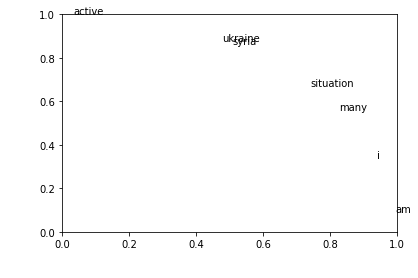

In [76]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()